Vamos capturar uma imagem da sua webcam e classificar o conteúdo!


<IPython.core.display.Javascript object>

Imagem capturada: photo.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Resultados da Classificação:
1: ox (11.49%)
2: hog (5.46%)
3: water_buffalo (4.67%)


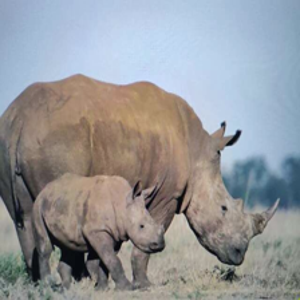

In [6]:
# %% [markdown]
# # Projeto de Reconhecimento de Imagens com Webcam no Colab
#
# Este projeto usa a webcam do seu computador para capturar imagens e classificar objetos usando um modelo de Machine Learning.

# %%
# Instalar dependências
!pip install -q tensorflow opencv-python pillow

# %%
import cv2
import numpy as np
from PIL import Image
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

# Carregar o modelo pré-treinado
model = MobileNetV2(weights='imagenet')

# %%
# Função para capturar imagem da webcam
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capturar';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# %%
# Função para preprocessar e classificar a imagem
def classify_image(img_path):
  img = Image.open(img_path)
  img = img.convert('RGB')
  img = img.resize((224, 224))  # Tamanho esperado pelo MobileNetV2
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis=0)
  processed_img = preprocess_input(img_array)

  predictions = model.predict(processed_img)
  results = decode_predictions(predictions, top=3)[0]

  print("\nResultados da Classificação:")
  for i, (id, label, prob) in enumerate(results):
    print(f"{i+1}: {label} ({prob*100:.2f}%)")

  display(img.resize((300, 300)))

# %%
# Execução principal
print("Vamos capturar uma imagem da sua webcam e classificar o conteúdo!")
filename = take_photo()
print(f"Imagem capturada: {filename}")
classify_image(filename)